In [127]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#%matplotlib inline

In [128]:
df = pd.read_csv('video_games_sales-4d95b457-b29e-46bd-98e3-bfdc24f46869.csv')

In [135]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### Задание: Используя датасет, визуализировать различными способами минимум три признака, а также минимум три взаимодействия между признаками. При необходимости можно оставлять пояснения и комментарии.



### 1. Посмотрим, в каком жанре игр выпускают больше всего:

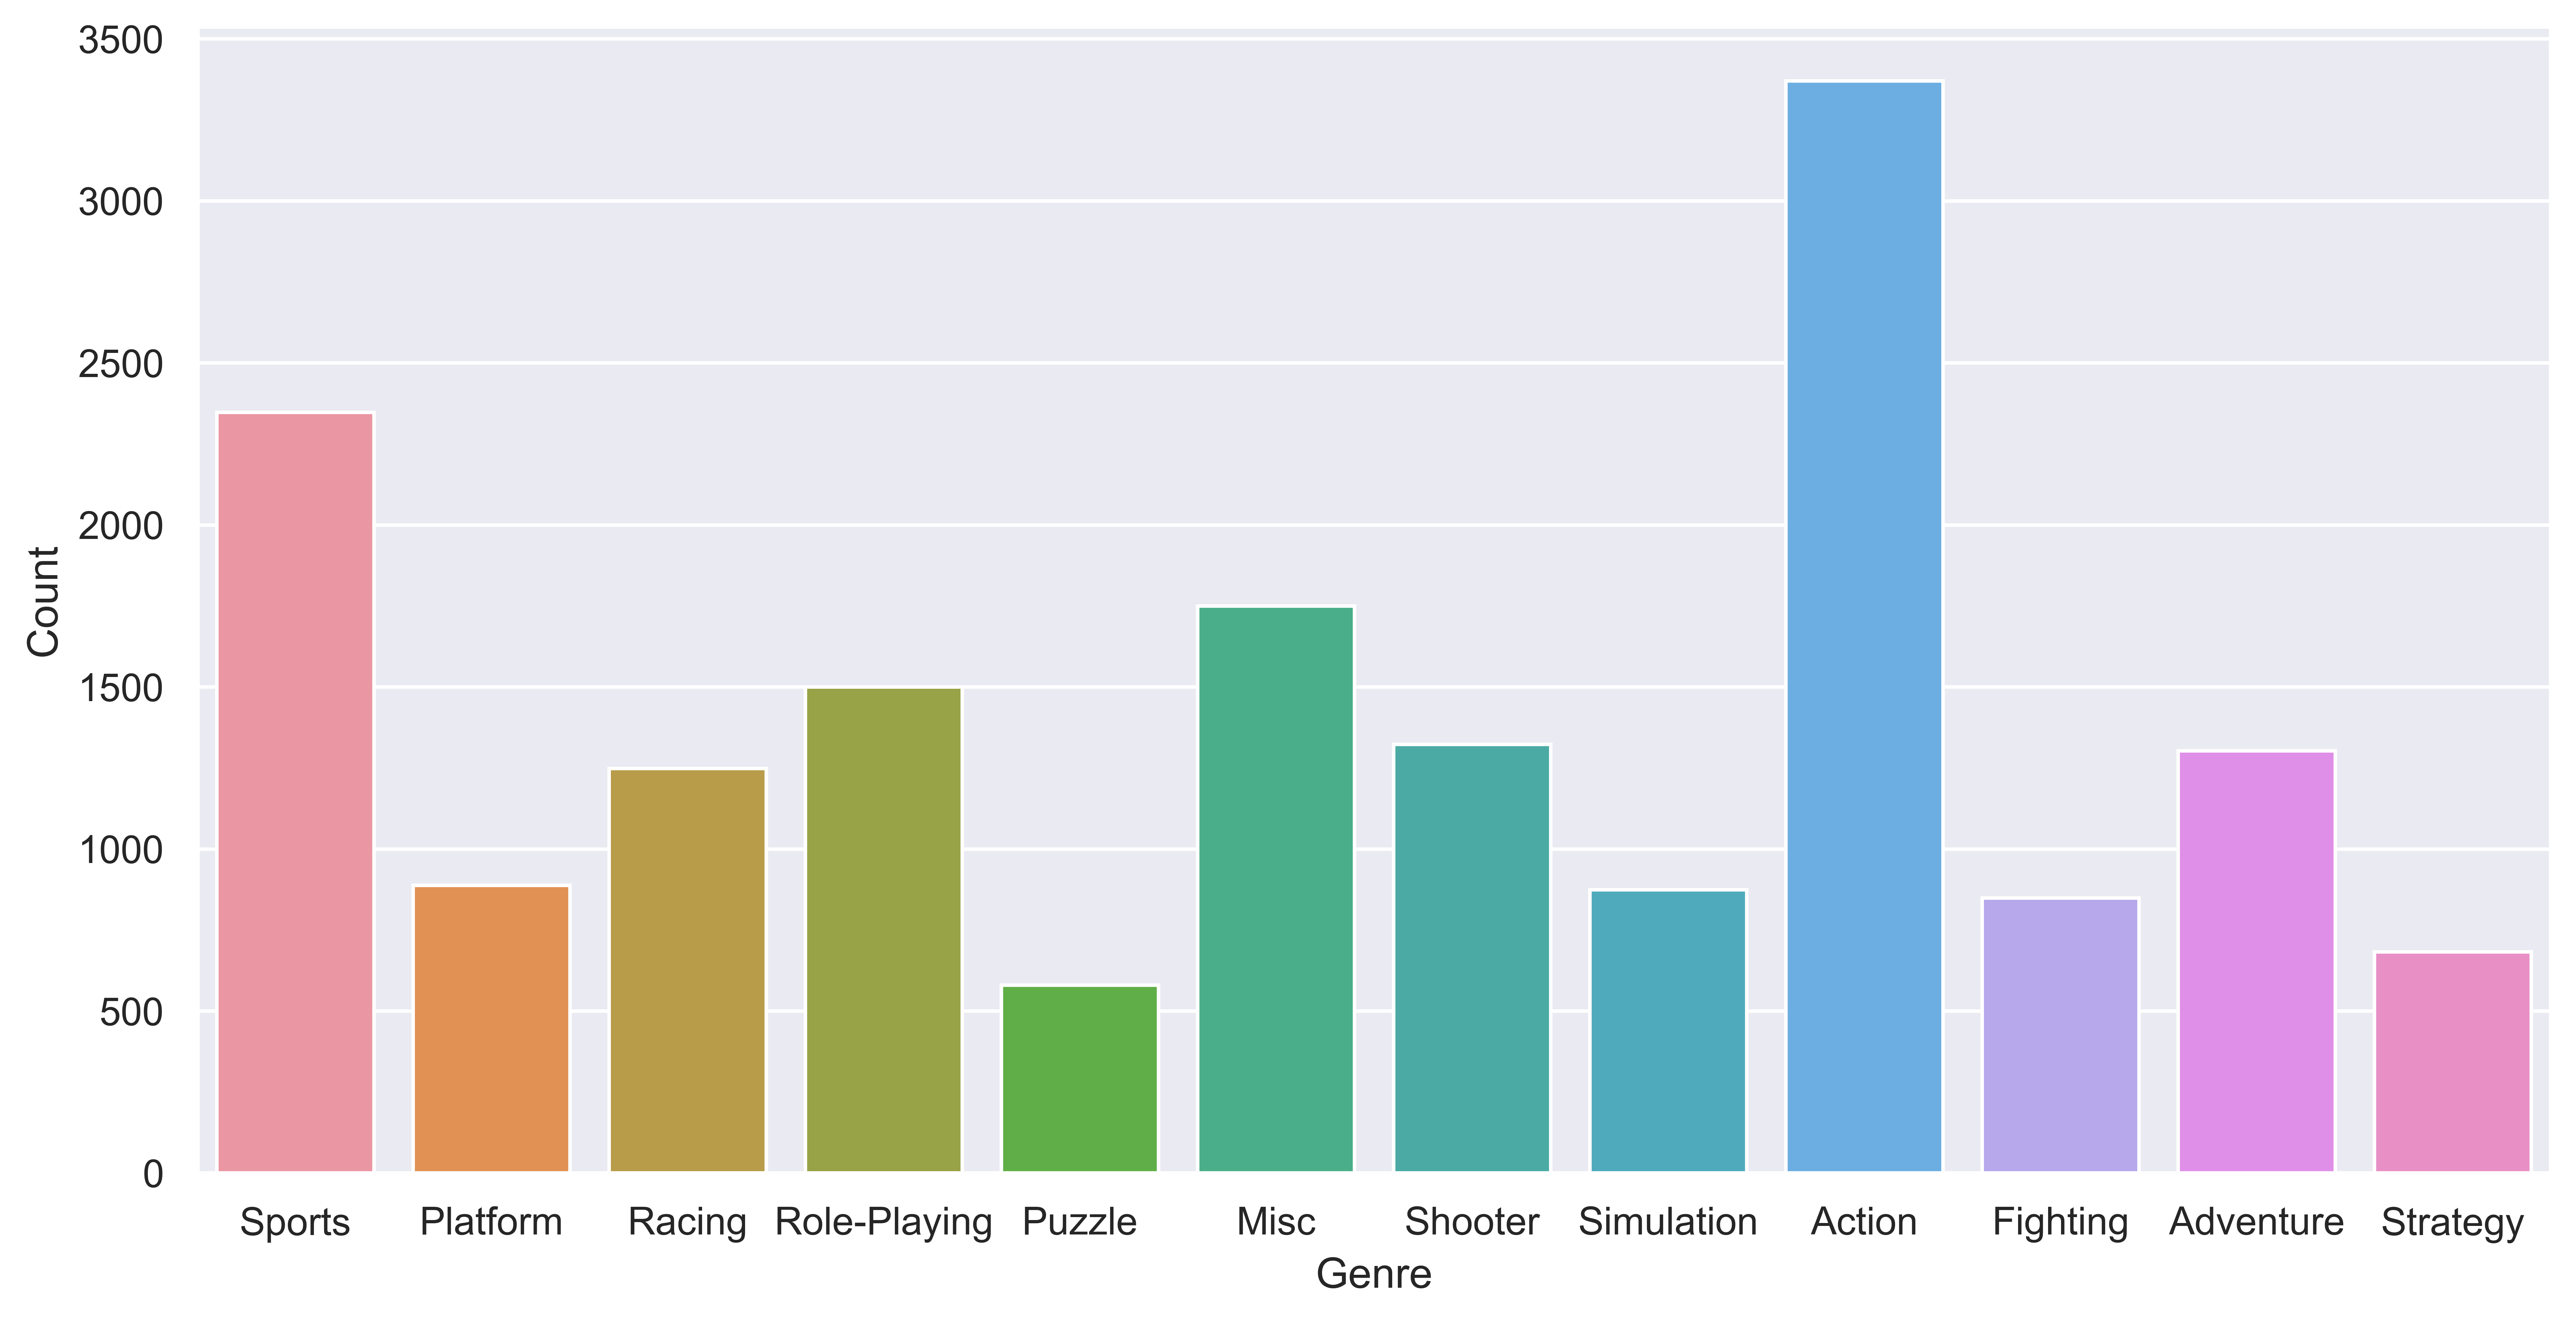

In [49]:
plt.figure(figsize=(12, 6), dpi=860)
ax = sns.countplot(x="Genre", data=df)
ax.set_ylabel('Count')
plt.show()

### Самые популярные жанры - action, sports. Непопулярные - puzzle.

### 2. Как распределены продажи?

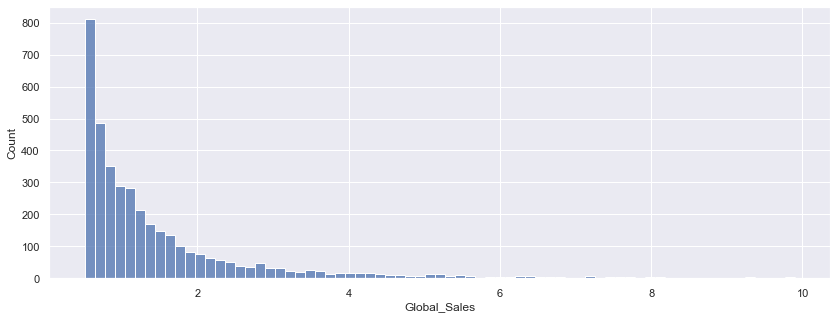

In [164]:
plt.figure(figsize=(14, 5))
ax = sns.histplot(data = df[((df['Global_Sales'] < 10) & (df['Global_Sales'] > 0.5))], x = 'Global_Sales')
plt.show()
#Беру такие значения, да, встречаются и другие, но их очень мало. 

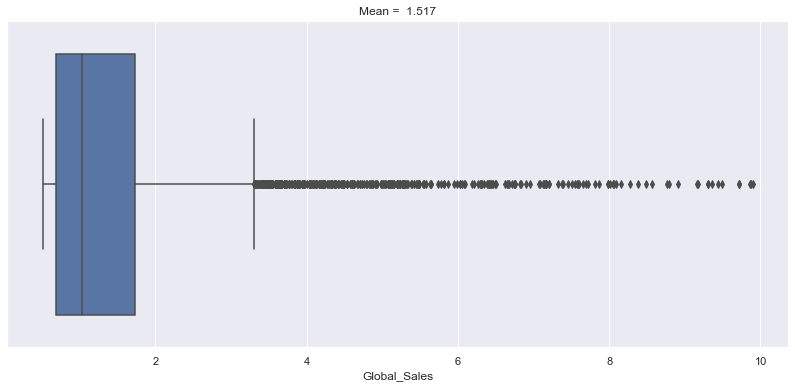

In [91]:
plt.figure(figsize=(14, 6))
Mean = df['Global_Sales'][((df['Global_Sales'] < 10) & (df['Global_Sales'] > 0.5))].mean()
ax = sns.boxplot(data = df[((df['Global_Sales'] < 10) & (df['Global_Sales'] > 0.5))], x = 'Global_Sales')
ax.set_title('Mean =  {:.3f}'.format(Mean))
plt.show()


### Большинство игр продается в диапозоне от 0.5 до 2. (не указаны единицы измерения)

### 3. Какие оценки?

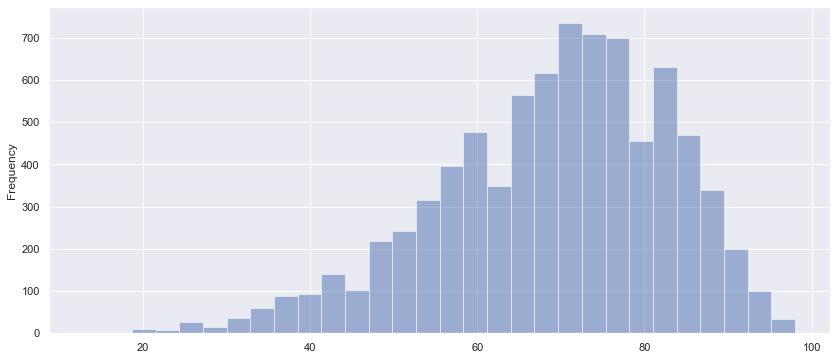

In [118]:
plt.figure(figsize=(14, 6))
df['Critic_Score'].plot.hist(alpha=0.5, bins = 30);
#plt.show()

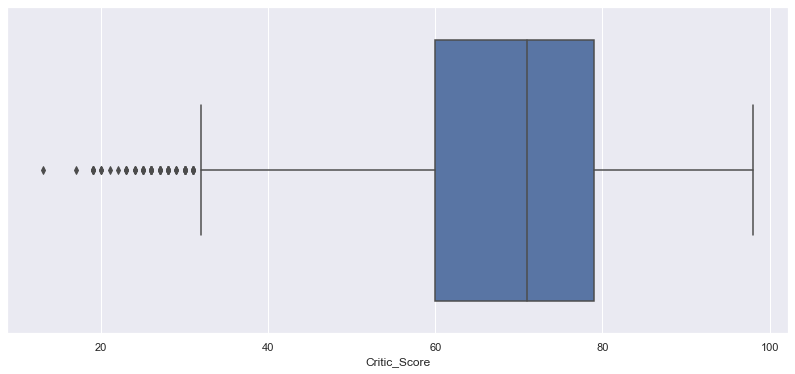

In [136]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data = df, x = 'Critic_Score')


#### Хотелось посмотреть еще на оценки пользователей, но в датасете почему-то он не числового типа. И привидение его к числовому типу:
#### df = df['User_Score'].apply(pd.to_numeric) не сработало. Жаль.

### Видно, что критики (почему-то) довольно редко ставят низкие оценки. Большинство значений от 60 до 80

## Взаимодействие между признаками

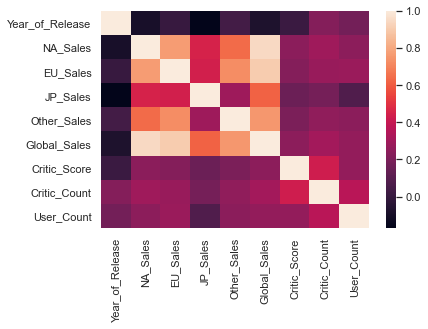

In [137]:
sns.heatmap(df.corr());

In [138]:
df.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,0.175339
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.283360
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.075638
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.238982
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000


### 1. Какая прибыль каждой компании в каждом из регионов? 

In [171]:
df_2 = df[['Publisher', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby('Publisher').sum()

In [172]:
df_2[df_2['Global_Sales'] > 0.5]

,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,
20th Century Fox Video Games,0.10,0.00,0.01,1.94
3DO,3.04,0.00,0.63,10.12
505 Games,16.19,2.05,5.31,55.32
5pb,0.00,1.64,0.00,1.66
989 Studios,3.30,0.10,0.67,13.32
...,...,...,...,...
Xseed Games,0.03,0.37,0.07,0.94
Zoo Digital Publishing,2.43,0.14,0.77,12.81
Zoo Games,0.00,0.00,0.27,4.67


#### Уф, слишком много компаний чтобы их изобразить, выделим топы по продажам

In [173]:
df_2 = df_2.sort_values(by='Global_Sales', ascending = False)

In [175]:
df_2.head(10)

,EU_Sales,JP_Sales,Other_Sales
Publisher,,,
Nintendo,419.01,458.15,94.68
Electronic Arts,373.91,14.35,128.96
Activision,215.90,6.71,75.81
Sony Computer Entertainment,186.56,74.15,79.67
Ubisoft,161.99,7.52,49.18
Take-Two Interactive,119.25,5.93,55.72
THQ,93.78,5.01,31.89
Konami Digital Entertainment,68.98,91.40,29.93
Sega,80.66,57.06,23.81


<AxesSubplot:xlabel='Publisher'>

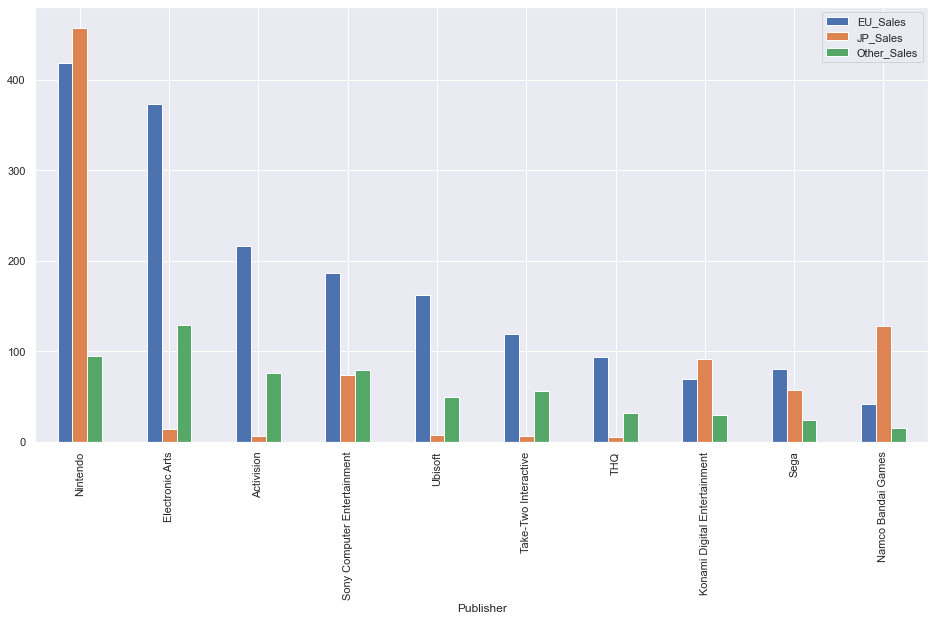

In [185]:
#df_2 = df_2.drop(columns = ['Global_Sales'])
df_2[:10].plot(kind = "bar", figsize = (16,8))

### Nintendo взял свою нишу в японском секторе. Однако отметим, у большинства компаний доход приносит именно европейский регион.

### 2. Определим динамику ценообразования

In [197]:
df_3 = df[['Year_of_Release', 'Global_Sales']].groupby('Year_of_Release').mean()

<AxesSubplot:xlabel='Year_of_Release'>

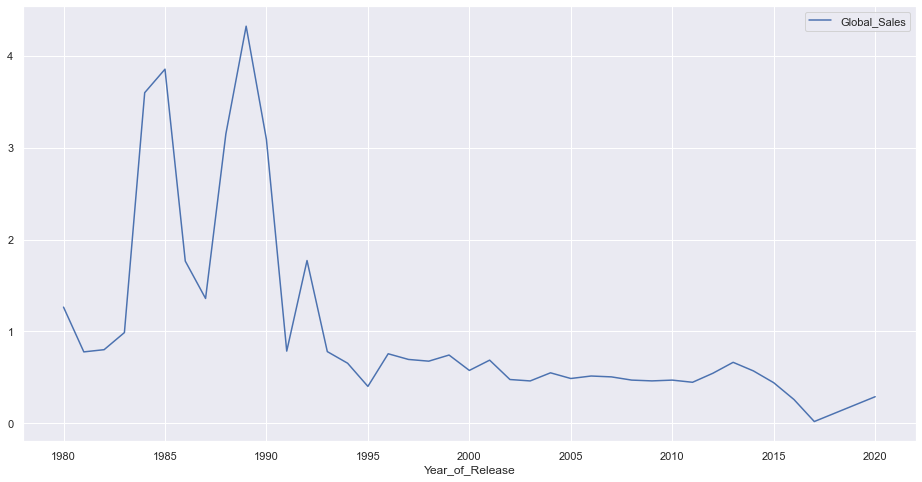

In [209]:
df_3.plot(figsize = (16,8))

### Как видно, в 20-м веке игры стоили довольно дорого)

### 3. Игры в каких жанрах приносят большую прибыль?

In [217]:
df_4 = df[['Rating', 'Global_Sales']].groupby('Rating').sum()

<AxesSubplot:xlabel='Rating'>

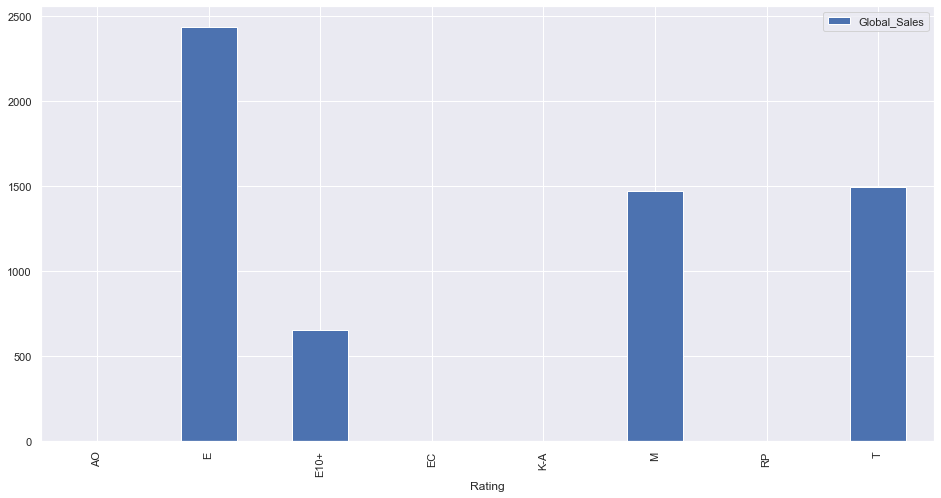

In [219]:
df_4.plot(kind = "bar", figsize = (16,8))

### Однако если построить график среднего:

In [221]:
df_5 = df[['Rating', 'Global_Sales']].groupby('Rating').mean()

<AxesSubplot:xlabel='Rating'>

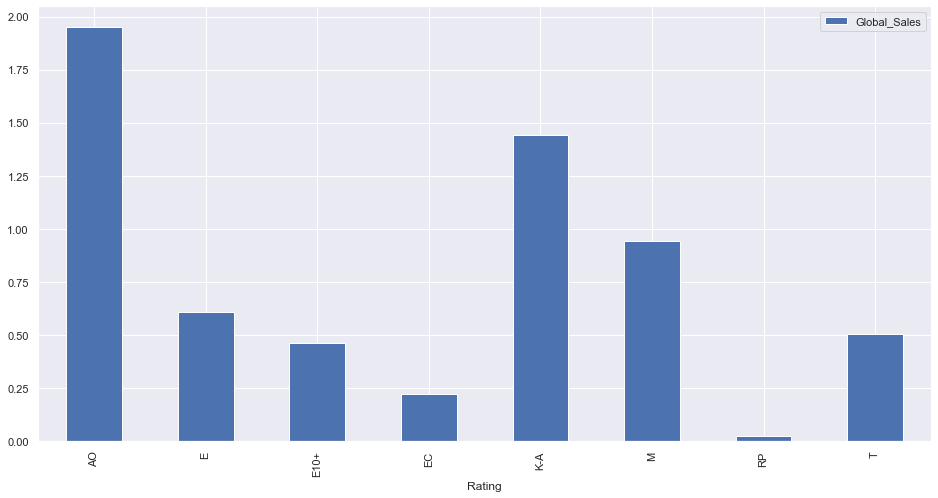

In [222]:
df_5.plot(kind = "bar", figsize = (16,8))

### Основную прибыль компаниям приносит жанр Е. АО же, как логично судить, довольно дорогой жанр и покупается не часто. 